In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop("RowNumber",axis=1)

In [4]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [5]:
df.Surname.value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
from sklearn.preprocessing import LabelEncoder

df["Surname"] = LabelEncoder().fit_transform(df["Surname"])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
samples = pd.get_dummies(df["Geography"], drop_first=True)
samples

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [12]:
df  = pd.concat([df, samples], axis=1)
df = df.drop("Geography", axis=1)
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,15634602,1115,619,Female,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,1177,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,2040,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,289,699,Female,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,1822,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,True


In [13]:
df["Gender"] = df["Gender"].map({
    "Female" : 0,
    "Male": 1
})

df.head(3)

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,15634602,1115,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,1177,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,2040,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False


In [14]:
cor_data = df.corr()
cor_data

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
CustomerId,1.000000,0.005689,0.005308,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800
Surname,0.005689,1.000000,0.007489,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822,-0.002913,-0.020464
CreditScore,0.005308,0.007489,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002641,-0.002049,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,0.009497,0.005550,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,-0.014883,-0.017412,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,-0.012419,0.002657,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.016972,-0.016460,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.014025,-0.008993,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.001665,0.001483,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732


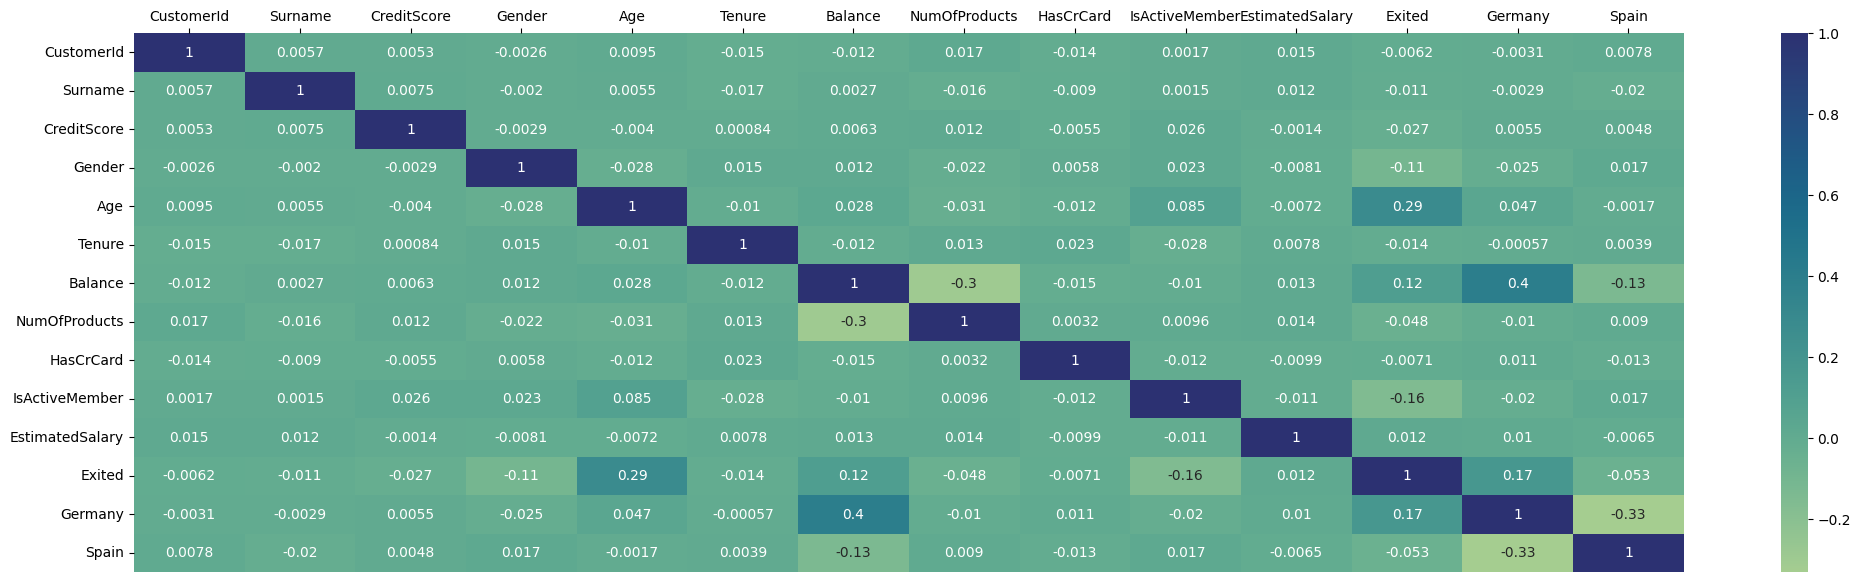

In [15]:
#Coefficient relations between the features
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(25,7))
ax= sn.heatmap(cor_data, annot=True, cmap="crest")
ax.xaxis.tick_top()

In [16]:
from sklearn.preprocessing import MinMaxScaler
columns = ["CustomerId", "Surname", "CreditScore", "Balance", "EstimatedSalary"]

for column in columns:
    mx = MinMaxScaler()
    df[column] = mx.fit_transform(df[[column]])
df.head()


,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.275616,0.380416,0.538,0,42,2,0.000000,1,1,1,0.506735,1,False,False
1,0.326454,0.401569,0.516,0,41,1,0.334031,1,0,1,0.562709,0,False,True
2,0.214421,0.696008,0.304,0,42,8,0.636357,3,1,0,0.569654,1,False,False
3,0.542636,0.098601,0.698,0,39,1,0.000000,2,0,0,0.469120,0,False,False
4,0.688778,0.621631,1.000,0,43,2,0.500246,1,1,1,0.395400,0,False,True


In [17]:
x = df.drop(["Exited"], axis=1)
y = df["Exited"]
x.shape, y.shape

((10000, 13), (10000,))

In [18]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

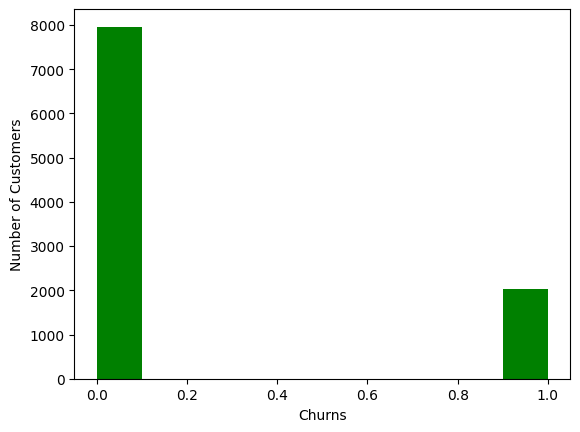

In [19]:
plt.xlabel("Churns")
plt.ylabel("Number of Customers")
plt.hist(df["Exited"], color="g")

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [21]:
x_sm.shape, y_sm.shape

((15926, 13), (15926,))

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7963.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

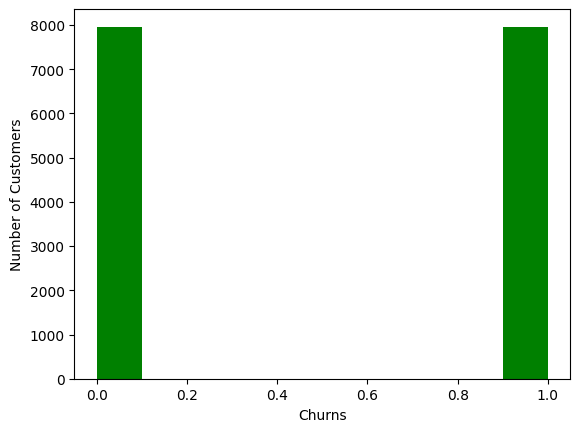

In [22]:
plt.xlabel("Churns")
plt.ylabel("Number of Customers")
plt.hist(y_sm, color="g")

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=23, stratify=y_sm)
x_train.shape, x_test.shape, y_train.value_counts()

((11944, 13),
 (3982, 13),
 Exited
 0    5972
 1    5972
 Name: count, dtype: int64)

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
ran = RandomForestClassifier(n_estimators=100)
dec = DecisionTreeClassifier()

models = {
    "RandomForest" : ran,
    "DesisionTree": dec,
    "LogisticRegression" : LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(gamma="auto", kernel="rbf"),
    "Naive Bayes": MultinomialNB(), 
    "Gradient Boosting": GradientBoostingClassifier()
}

In [27]:
#Training the dataset with different types of models
scores = []
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    scores.append({
        "Model_name": name,
        "Test Accuracy": var.score(x_test, y_test), 
        # "Accuracy": accuracy_score(y_test,y_predict),
        "precision" : precision_score(y_test, y_predict, zero_division=0),
        "recall" : recall_score(y_test, y_predict),
        "f1_score" : f1_score(y_test, y_predict)
        
    })
df1 = pd.DataFrame(scores)
df1

,Model_name,Test Accuracy,precision,recall,f1_score
0,RandomForest,0.881718,0.884615,0.877951,0.881270
1,DesisionTree,0.810397,0.807157,0.815671,0.811391
2,LogisticRegression,0.738322,0.741968,0.730789,0.736336
3,Support Vector Machine,0.815922,0.822234,0.806128,0.814101
4,Naive Bayes,0.713712,0.718093,0.703666,0.710807
5,Gradient Boosting,0.836263,0.842806,0.826720,0.834686


In [28]:
#We can see that random forest classifier and gradientboosting classifier is giving the highest accuracies

model1 = ran.fit(x_train, y_train)
model1.score(x_test, y_test)

0.8829733802109493

In [29]:
model2 = GradientBoostingClassifier()
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.8362631843294827

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

In [45]:
def metrics(y_pred, y_test, model_name):
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    %matplotlib inline
    plt.figure(figsize=(7,5))
    ax= sn.heatmap(cm, annot=True, cmap="crest")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    ax.xaxis.set_ticklabels(["churn=no", "churn=yes"])
    ax.yaxis.set_ticklabels(["churn=no", "churn=yes"])
    plt.title(model_name)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1991
           1       0.88      0.88      0.88      1991

    accuracy                           0.88      3982
   macro avg       0.88      0.88      0.88      3982
weighted avg       0.88      0.88      0.88      3982



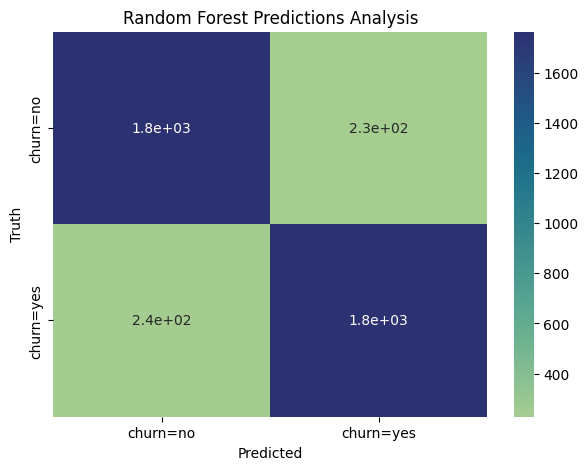

In [47]:
#classification report and confusion matrix for Randomforest classifier predictiions
y_pred1 = model1.predict(x_test)
metrics(y_pred1, y_test, "Random Forest Predictions Analysis")

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1991
           1       0.84      0.83      0.83      1991

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



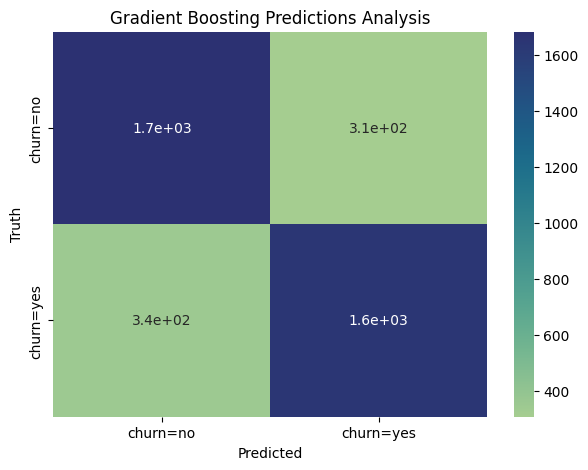

In [48]:
#classification report and confusion matrix for Gradient Boosting classifier predictiions
y_pred2 = model2.predict(x_test)
metrics(y_pred2, y_test, "Gradient Boosting Predictions Analysis")